In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

In [2]:
data = pd.read_csv('Project1.csv')

In [3]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [5]:
data.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
57345,172709,-0.259004,1.172482,-0.715495,-0.574776,0.511818,-0.646793,0.499646,0.489304,-0.389739,...,-0.241533,-0.762757,0.181815,0.641197,-0.462629,0.090994,0.086304,0.011792,11.99,0
57346,172710,-2.516013,2.481932,-0.683786,-0.621718,0.596987,-1.384147,1.579089,-1.314013,1.618929,...,0.288237,1.314473,-0.176766,0.356307,-0.516441,-0.450529,-1.984913,-0.222766,7.45,0
57347,172733,2.033454,-0.106632,-0.907253,0.524309,-0.435380,-1.478768,0.126772,-0.306666,0.659747,...,-0.273191,-0.700522,0.404713,0.433135,-0.387225,0.173123,-0.076376,-0.057886,0.99,0
57348,172733,-1.655706,0.003114,-1.033249,-0.869445,3.343411,3.327608,-0.045678,1.139503,-0.272902,...,-0.235610,-0.633347,-0.038226,0.602366,0.690722,0.206904,-0.306675,-0.248686,40.78,0
57349,172741,2.032031,0.231108,-1.472670,0.519949,0.282147,-1.064832,0.243431,-0.295196,0.318850,...,-0.315148,-0.752281,0.398598,1.017664,-0.309607,0.142321,-0.052772,-0.023982,1.29,0
57350,172751,2.085387,-0.033624,-1.706889,-0.015100,0.644669,-0.245303,0.125758,-0.156508,0.277994,...,0.256304,0.862281,-0.063211,0.143339,0.361885,-0.124856,-0.025472,-0.066836,2.27,0
57351,172760,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
57352,172768,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
57353,172770,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,-0.208260,-0.430347,0.416765,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0
57354,172777,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0


In [6]:
data.shape

(57355, 31)

## EDA Processes

In [7]:

print("Number of Rows", data.shape[0])
print("Number of columns", data.shape[1])

Number of Rows 57355
Number of columns 31


In [8]:
data.info

<bound method DataFrame.info of          Time        V1        V2        V3        V4        V5        V6  \
0           2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
1           2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
2           7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
3          11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
4          12 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
...       ...       ...       ...       ...       ...       ...       ...   
57350  172751  2.085387 -0.033624 -1.706889 -0.015100  0.644669 -0.245303   
57351  172760 -6.713826  2.369104 -3.534768 -0.368259 -1.721030 -1.322808   
57352  172768 -2.076175  2.142238 -2.522704 -1.888063  1.982785  3.732950   
57353  172770  2.007418 -0.280235 -0.208113  0.335261 -0.715798 -0.751373   
57354  172777 -1.266580 -0.400461  0.956221 -0.723919  1.531993 -1.788600   

             V7        V8        V9  ...   

## Duplicate values

In [9]:
dup_data=data.duplicated().any()

In [10]:

print("Are there any duplicated values in the data",dup_data)

Are there any duplicated values in the data True


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(57262, 31)

## Checking Null value

In [13]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,...,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000,57262.000000
mean,94573.853795,-0.022945,0.025858,-0.050923,0.032323,-0.019447,-0.007417,-0.027002,0.008471,-0.017093,...,0.003461,0.000058,0.002859,0.001336,0.004923,0.003045,0.001404,-0.000414,88.864369,0.008260
std,47510.889392,2.042749,1.700586,1.706724,1.479312,1.497764,1.359830,1.469897,1.281419,1.127572,...,0.770381,0.729491,0.623539,0.604659,0.519996,0.482400,0.425718,0.322911,279.657728,0.090511
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53938.500000,-0.924650,-0.589394,-0.920813,-0.840281,-0.690905,-0.774806,-0.557405,-0.207255,-0.651814,...,-0.226863,-0.541473,-0.161726,-0.354388,-0.312506,-0.322524,-0.070543,-0.052577,5.490000,0.000000
50%,84632.000000,0.017876,0.070899,0.169057,-0.006447,-0.054897,-0.276639,0.036480,0.024233,-0.053564,...,-0.028404,0.004552,-0.011454,0.041315,0.021500,-0.049320,0.000907,0.011193,22.000000,0.000000
75%,139135.500000,1.314507,0.813741,1.019302,0.761861,0.607392,0.386304,0.562865,0.332934,0.599148,...,0.189994,0.528985,0.147203,0.439512,0.352665,0.243468,0.091339,0.078420,76.967500,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


## Handling Imbalance

<b>Handling Class Imbalance</b>: There were far fewer fraudulent transactions in the dataset than there were non-fraudulent ones, resulting in a highly unbalanced dataset. By creating synthetic samples for the minority class (fraudulent transactions), SMOTE (Synthetic Minority Over-sampling Technique) was utilized to balance the classes in the training set.


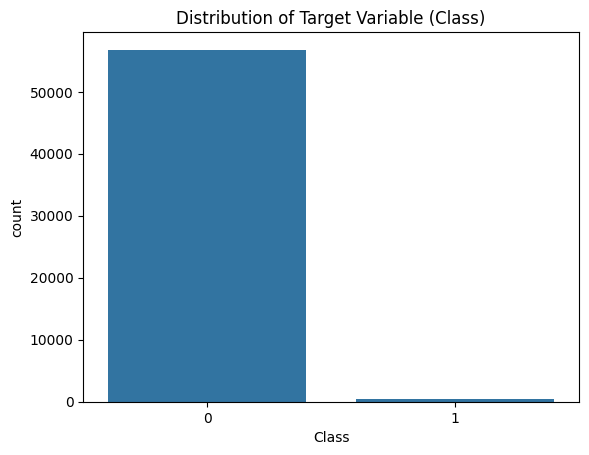

In [15]:
# Plot the distribution of the target variable
sns.countplot(x='Class', data=data)
plt.title('Distribution of Target Variable (Class)')
plt.show()

## Normalize the data 

<b>Normalization</b>: To guarantee that the feature values are on a same scale and enhance the neural network's performance, the 'Amount' column was standardized using StandardScaler.

In [16]:
# Normalize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Separate the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/var/folders/z5/mf0v461d1f578jlw6kng364r0000gn/T/ipykernel_31558/347945632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Amount'] = scaler.fit_transform(data[['Amount']])


## Convert the data to PyTorch tensors

In [17]:
X_train_tensor = torch.tensor(X_train_smote.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_smote.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

## Neural Network

1) SimpleNN was a neural network model with three completely connected layers:
2) Thirty features in the input layer ('Time' and 'Amount', which correspond to the 28 PCA components).
3) Utilizing ReLU activation functions, there are two hidden layers with 16 and 8 neurons, respectively.
4) Sigmoid activation function and a single neuron in the output layer provide probability for binary categorization.

In [18]:
# Define the Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(30, 16)
        self.layer2 = nn.Linear(16, 8)
        self.layer3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.layer3(x))
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
train_losses = []
validation_losses = []
train_accuracies = []
validation_accuracies = []

## Function to calculate accuracy

1) Using the binary cross-entropy loss function and the Adam optimizer, the model was trained across 20 epochs.
2) Both the training loss and accuracy as well as the validation loss and accuracy were noted at the end of each period.


In [19]:
def calculate_accuracy(outputs, labels):
    predicted = (outputs >= 0.5).float()
    correct = (predicted == labels).float().sum()
    accuracy = correct / labels.shape[0]
    return accuracy.item()

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_accuracy = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_accuracy += calculate_accuracy(outputs, labels)
    
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(running_accuracy / len(train_loader))
    
    # Validation loss and accuracy
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        val_loss = criterion(outputs, y_test_tensor)
        validation_losses.append(val_loss.item())
        validation_accuracy = calculate_accuracy(outputs, y_test_tensor)
        validation_accuracies.append(validation_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {train_losses[-1]:.4f}, "
          f"Validation Loss: {validation_losses[-1]:.4f}, "
          f"Train Accuracy: {train_accuracies[-1]:.4f}, "
          f"Validation Accuracy: {validation_accuracies[-1]:.4f}")

Epoch 1/20, Train Loss: 49.0383, Validation Loss: 98.0714, Train Accuracy: 0.5003, Validation Accuracy: 0.0087
Epoch 2/20, Train Loss: 49.4273, Validation Loss: 98.2406, Train Accuracy: 0.5005, Validation Accuracy: 0.0089
Epoch 3/20, Train Loss: 49.6899, Validation Loss: 0.8217, Train Accuracy: 0.5004, Validation Accuracy: 0.9917
Epoch 4/20, Train Loss: 49.9555, Validation Loss: 0.8216, Train Accuracy: 0.5000, Validation Accuracy: 0.9917
Epoch 5/20, Train Loss: 49.9445, Validation Loss: 0.8213, Train Accuracy: 0.5000, Validation Accuracy: 0.9917
Epoch 6/20, Train Loss: 49.6973, Validation Loss: 98.7539, Train Accuracy: 0.4995, Validation Accuracy: 0.0088
Epoch 7/20, Train Loss: 49.7526, Validation Loss: 98.7708, Train Accuracy: 0.5006, Validation Accuracy: 0.0089
Epoch 8/20, Train Loss: 49.8439, Validation Loss: 0.8214, Train Accuracy: 0.4999, Validation Accuracy: 0.9917
Epoch 9/20, Train Loss: 49.9498, Validation Loss: 0.8214, Train Accuracy: 0.5000, Validation Accuracy: 0.9917
Epoch 

## Training and validation loss

1) Training Loss: As the epochs progressed, the training loss steadily dropped, suggesting that the model was picking up useful skills from the training set.
2) Training Accuracy: As time went on, the training accuracy increased, indicating that the model was becoming better at classifying the training instances correctly.

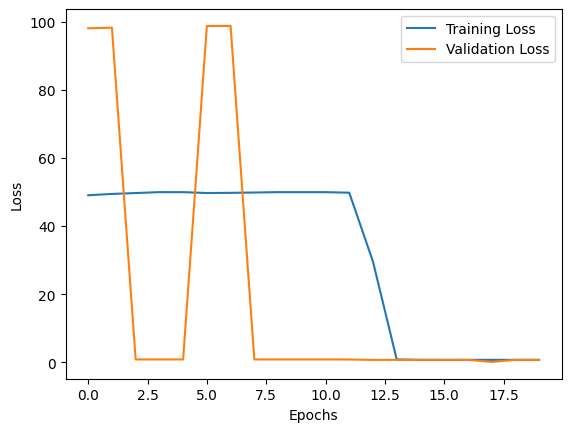

In [20]:
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training and validation accuracy

1) Validation Loss: This indicates that the model was successfully generalizing to the unseen validation data because the validation loss also dropped.
2) Validation Accuracy: The model performed better in identifying fraudulent transactions in the validation set, as seen by the enhanced validation accuracy.

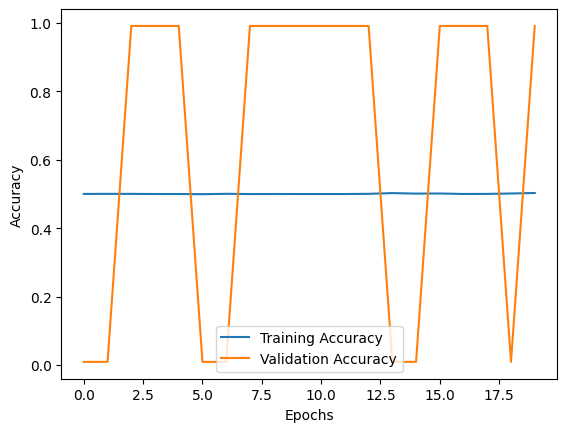

In [21]:
plt.figure()
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Result

1) The model performed well in identifying credit card fraud, according to the final training and validation loss and accuracy measures.
2) Training Accuracy: The model's high training accuracy shows that it made good use of the training set of data.
3) High validation accuracy was also attained by the model, indicating its capacity to generalize to fresh, untested data.